不带正则化项的损失函数为
$$
J_0 = J(\Theta) = \sum_i^m  (h_{\Theta}(X^{(i)}) - y^{(i)})^2 
$$
岭回归（Ridge Regression）: L2-norm 正则化项
$$
J(\Theta) = J_0 + \lambda \sum_j^n\theta_j^2
$$
Lasso回归： L1-norm正则化项
$$
J(\Theta) = J_0 + \lambda \sum_j^n|\theta_j|
$$

* L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择
* L2正则化可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合

## 为什么L1正则化可以产生稀疏模型（L1是怎么让系数等于零的），以及为什么L2正则化可以防止过拟合

### L1正则化和特征选择
$J(\Theta) = J_0 + \lambda \sum_j^n|\theta_j|$

其中$J_0$是原始的损失函数，后面是L1正则化项，$\lambda$是正则化系数。
这里J是不完全可微的函数。
我们在$J_0$后面加L1正则化项时，相当于最$J_0$做了个约束，此时我们的任务是在正则化约束条件下，求出$J_0$取最小值的参数。
考虑二维的情况，只有两个参数$\theta_1$和$\theta_2$,此时约束项为$L = |\theta_1|+|\theta_2|$, 此时画出$J_0$的等值线和L约束项，如下图：
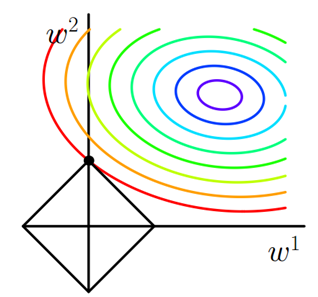
图中等值线是$J_0$的等值线，黑色方形是L函数的图形。在图中，当$J_0$等值线与L图形首次相交的地方就是最优解。上图中$J_0$与L在L的一个顶点处相交，这个顶点就是最优解。注意到这个顶点的值是$\theta_1, \theta_2 = (0, \theta)。可以直观想象，因为L函数有很多『突出的角』（二维情况下四个，多维情况下更多）。$J_0$与这些角接触的机率会远大于与LL其它部位接触的机率，而在这些角上，会有很多权值等于0，这就是为什么L1正则化可以产生稀疏模型，进而可以用于特征选择。

而正则化前面的系数$\lambda$，可以控制L图形的大小。$\lambda$越小，L的图形越大（上图中的黑色方框）；$\lambda$越大，L的图形就越小，可以小到黑色方框只超出原点范围一点点，这是最优点的值中的$\theta$可以取到很小的值。

### L2正则化
类似的L2正则化的图形为：
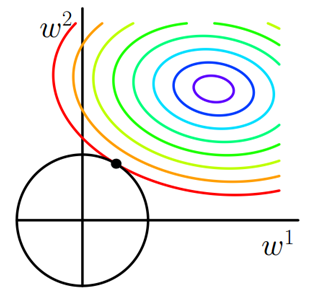
二维平面下L2正则化的函数图形是个圆，与方形相比，被磨去了棱角。因此J0与L相交时使得w1或w2等于零的机率小了许多，这就是为什么L2正则化不具有稀疏性的原因。
#### L2正则化为啥能避免过拟合
拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，专业一点的说法是『抗扰动能力强』。

#### L2正则化为什么能得到比较小的参数呢
以线性回归中的梯度下降法为例；假设要求的参数是$\theta$, $h_{\theta}(x)$是我们的假设函数，那么线性回归的代价函数如下：
$$
    J(\theta) = \frac{1}{2m} \sum_i^m  (h_{\theta}(x^{(i)}) - y^{(i)})^2
$$
在梯度下降中，最终用于迭代计算$\theta$的迭代式为：
$$
    \theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m\left( h_{\theta}(x^{(i)} - y^{(i)} \right)x^{(i)}_j
$$
其中$\alpha$为学习率， 上面上没有正则化的迭代公式，当添加正则化之后。
$$
   J(\theta) = \frac{1}{2m} \left[ \sum_i^m  (h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda\sum_j^n \theta_j^2 \right] \\
   \theta_j = \theta_j - \alpha \left (\frac{1}{m}\sum_{i=1}^m\left( h_{\theta}(x^{(i)} - y^{(i)} \right)x^{(i)}_j + \frac{1}{m}\lambda \theta_j \right) \\
   \theta_j = (1-\alpha\frac{\lambda}{m})\theta_j - \alpha \frac{1}{m}\sum_{i=1}^m\left( h_{\theta}(x^{(i)} - y^{(i)} \right)x^{(i)}_j
$$
其中$\lambda$为正则化因子，由上式可知，每次迭代$\theta_j$都要先乘以一个小于1的因子，从而使$\theta_j$的绝对值不断减小。

疑问：
1. 迭代计算的过程$\theta_j$本来就是不断变化的，每次迭代乘以一个小于1的因子，看起来只是加快了其迭代的步长，似乎不应该具有抑制过拟合的功效？
  每次迭代$\theta_j$都要先乘以一个小于1的因子应该是每次迭代的$\theta_j$的绝对值相对较小相对于没有正则化的迭代项，因此可以得到绝对值较小的参数。
2. 从迭代公式来看，似乎迭代次数越多，最终得到的$\theta_j$绝对值越小，因为每次迭代都会乘以一个小于1的因子。那么是否当$\alpha$设置的足够小的时候，$\theta_j$是否会趋于0？
  我想是的，下面写个程序验证一下这个猜想

(9, 1)
(9, 1)


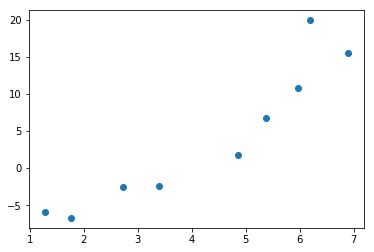

In [179]:
# 构造数据集
# y = x^2 - 4x -3
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

m = 9

x = np.linspace(0, 7, m) + np.random.randn(m)
x = np.sort(x)

y = x**2 - 4*x - 3 + np.random.randn(m) * x

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x.shape)
print(y.shape)

plt.figure()
plt.scatter(x,y)
plt.show()

In [142]:
# 轮子：岭回归-梯度下降法

# X: m*n
# theta: n*1
# y: m*1
def ComputeCost(X, y, theta, Lambda=10):
    m, n = X.shape
    y_hat = X.dot(theta)
    cost = sum((y_hat - y)**2) + Lambda*sum(theta**2)
    cost = cost/(2*m)
    return cost

    
def ComputeGrad(X, y, theta):
    y_hat = np.dot(X, theta)
    residual = y_hat - y
    grad = (residual.T.dot(X)).T
    return grad/m


def RidgeRegression(X, y, alpha=0.3, Lambda=10, num_iter=1000):
    m, n = X.shape
    
    # 初始化theta
    #theta = np.random.randn(n).reshape((-1,1))
    theta = np.zeros((n,1))
    
    factor = (1 - alpha * Lambda/m)
    
    for i in range(num_iter):
        #if i%100 ==0: print(ComputeCost(X, y, theta, Lambda=Lambda))
        theta = factor * theta - alpha*ComputeGrad(X, y, theta)
    return theta

def RidgeRegressionMatrix(X, y, Lambda):
    theta = np.linalg.inv(X.T.dot(X) - Lambda*np.eye(X.shape[1])).dot(X.T).dot(y)
    return theta

# X: m*n
# theta: n*1
def predict(X, theta):
    return X.dot(theta)


In [160]:
# 数据预处理
from sklearn.preprocessing import PolynomialFeatures

linear_featurizer = PolynomialFeatures(degree=1)
quadratic_featurizer = PolynomialFeatures(degree=2)
cubic_featurizer = PolynomialFeatures(degree=3)
quadruplic_featurizer = PolynomialFeatures(degree=4)

X_train_linear = linear_featurizer.fit_transform(x)
X_train_quadratic = quadratic_featurizer.fit_transform(x)
X_train_cubic = cubic_featurizer.fit_transform(x)
X_train_quadruplic = quadruplic_featurizer.fit_transform(x)

print(x.shape)
print(X_train_linear.shape)
print(X_train_quadratic.shape)
print(X_train_cubic.shape)
print(X_train_quadruplic.shape)

(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)


In [165]:

theta = RidgeRegression(X_train_quadratic, y, Lambda= 100, alpha=0.000003, num_iter=100000)
cost = ComputeCost(X_train_quadratic, y, theta)
print(theta)
print(cost)

theta = RidgeRegression(X_train_quadratic, y, Lambda=100,  alpha=0.0000003, num_iter=1000000)
cost = ComputeCost(X_train_quadratic, y, theta)
print(theta)
print(cost)


[[-0.29871686]
 [-0.69714689]
 [ 0.56872097]]
[18.37260824]
[[-0.29871646]
 [-0.69714591]
 [ 0.56872084]]
[18.37261715]


由上面学到的$\theta$来看，步长小一点，迭代次数多一点学到的$\theta$的绝对值要小一些。

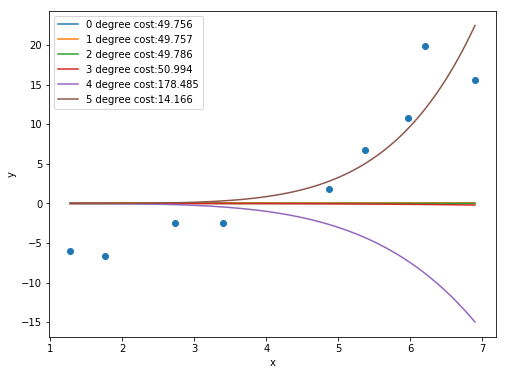

In [186]:
# 训练数据集 并画出
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6), facecolor='w')
plt.scatter(x,y)
for degree in range(6):
    featurizer = PolynomialFeatures(degree = degree+1)
    X_train = featurizer.fit_transform(x)
    theta = RidgeRegressionMatrix(X_train, y, Lambda=1000000000)
    cost = ComputeCost(X_train, y, theta, Lambda=1000000000)
    
    # 画图
    # 计算图形点
    x_hat = np.linspace(x.min(),x.max(), num=100)
    x_hat=x_hat.reshape(-1,1)
    y_hat = predict(featurizer.fit_transform(x_hat), theta)
    label = "%d degree cost:%.3f"% (degree, cost)
    plt.plot(x_hat, y_hat, label=label)
    
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
    

## 岭回归优化求解
$$
\begin{align}
J(\Theta) &= \sum_i^m  (h_{\Theta}(X^{(i)}) - y^{(i)})^2 + \lambda \sum_j^n\theta_j^2 \\
       &= (h_{\Theta}(X) -y)^T((h_{\Theta}(X) -y) + \lambda \Theta^T\Theta \\
       & =  (X\Theta - y)^T(X\Theta-y)  + \lambda \Theta^T\Theta \\
\end{align}
$$
矩阵求导的：
$$
\frac{\partial{J(\Theta)}}{\partial{\Theta}} = 2X^TX\Theta-2X^Ty + 2\lambda\Theta
$$

令导数为0得
$$
\Theta = (X^TX+\lambda I)^{-1}X^Ty
$$

参考：
https://blog.csdn.net/jinping_shi/article/details/52433975